<a href="https://colab.research.google.com/github/yoavh28/AIProject/blob/main/ParkinsonProjectAI236502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
#for Yoav
#upload data of participants
from google.colab import files
uploadedData = files.upload()
filename = list(uploadedData)[0]

Saving voice001.hea to voice001.hea
Saving voice001.wav to voice001.wav
Saving voice002.hea to voice002.hea
Saving voice002.wav to voice002.wav
Saving voice003.hea to voice003.hea
Saving voice003.wav to voice003.wav
Saving voice004.hea to voice004.hea
Saving voice004.wav to voice004.wav
Saving voice005.hea to voice005.hea
Saving voice005.wav to voice005.wav
Saving voice006.hea to voice006.hea
Saving voice006.wav to voice006.wav
Saving voice007.hea to voice007.hea
Saving voice007.wav to voice007.wav
Saving voice008.hea to voice008.hea
Saving voice008.wav to voice008.wav
Saving voice009.hea to voice009.hea
Saving voice009.wav to voice009.wav
Saving voice010.hea to voice010.hea
Saving voice010.wav to voice010.wav
Saving voice011.hea to voice011.hea
Saving voice011.wav to voice011.wav
Saving voice012.hea to voice012.hea
Saving voice012.wav to voice012.wav
Saving voice013.hea to voice013.hea
Saving voice013.wav to voice013.wav
Saving voice014.hea to voice014.hea
Saving voice014.wav to voice

In [ ]:
#for delete
'''import os

# Define the base file name pattern and the number of files to delete
base_file_pattern_hea = 'voice{:03d}.hea'
num_files = 208

# Specify the directory where the files are located (update this path if necessary)
directory = '/content/'  # Change this to the actual directory path

# Iterate through the file numbers and delete the corresponding files
for file_number in range(1, num_files + 1):
    file_to_delete_wav = os.path.join(directory, base_file_pattern_wav.format(file_number))
    file_to_delete_hea = os.path.join(directory, base_file_pattern_hea.format(file_number))

    # Check if the .wav file exists before attempting to delete it
    if os.path.exists(file_to_delete_wav):
        os.remove(file_to_delete_wav)
        print(f"{file_to_delete_wav} has been deleted.")
    else:
        print(f"{file_to_delete_wav} does not exist.")

    # Check if the .hea file exists before attempting to delete it
    if os.path.exists(file_to_delete_hea):
        os.remove(file_to_delete_hea)
        print(f"{file_to_delete_hea} has been deleted.")
    else:
        print(f"{file_to_delete_hea} does not exist.")'''

'/content'

In [ ]:
import numpy as np
import pandas as pd

# Define the base file name pattern and the number of files to process
base_file_pattern = 'voice{:03d}.hea'
num_files = 208

# Initialize a 2D array to store the results with an extra row for the header
results = np.empty((num_files + 1, 5), dtype=object)

# Add the header as the first row
header = ["no.", "age", "sex", "situation", "medications"]
results[0] = header

for file_number in range(1, num_files + 1):
    file_name = base_file_pattern.format(file_number)

    with open(file_name) as f:
        lines = [line.rstrip('\n') for line in f]

    # Split the lines into a list if needed, and get the first line
    split_lines = [line.split() for line in lines]
    name = split_lines[0][0]

    # Create a list `ls` containing specific elements from the last line
    last_line = split_lines[-1]
    indices_to_select = [1, 3, 5, -1]

    ls = [name] + [last_line[i] for i in indices_to_select]

    # Store the result in the 2D array
    results[file_number] = ls

# Now `results` contains both the header and the data


# Print the 2D array
print(results)
df = pd.DataFrame(results)

# Define the file name
file_name = "my_array.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_name, index=False, header=False)  # Set index and header to False if you don't want them in the CSV file

[['no.' 'age' 'sex' 'situation' 'medications']
 ['voice001' '32' 'M' 'hyperkinetic' 'none']
 ['voice002' '55' 'M' 'healthy' 'none']
 ...
 ['voice206' '22' 'F' 'healthy' 'none']
 ['voice207' '30' 'F' 'healthy' 'none']
 ['voice208' '39' 'F' 'hyperkinetic' 'none']]


In [ ]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#STEP 1: DATA READING AND UNDERSTANDING
file_name = "my_array.csv"
df = pd.read_csv(file_name)
print(df)



          no.  age sex     situation medications
0    voice001   32   M  hyperkinetic        none
1    voice002   55   M       healthy        none
2    voice003   34   M  hyperkinetic        none
3    voice004   28   F   hypokinetic        none
4    voice005   54   F   hypokinetic        none
..        ...  ...  ..           ...         ...
203  voice204   59   F       healthy        none
204  voice205   30   F  hyperkinetic        none
205  voice206   22   F       healthy        none
206  voice207   30   F       healthy        none
207  voice208   39   F  hyperkinetic        none

[208 rows x 5 columns]


In [ ]:


#Count productivity values to see the split between Good and Bad
sizes = df['situation'].value_counts(sort = 1)
print(sizes)

hyperkinetic    73
healthy         57
hypokinetic     40
reflux          38
Name: situation, dtype: int64


In [ ]:
print(df)

          no.  age sex     situation medications
0    voice001   32   M  hyperkinetic        none
1    voice002   55   M       healthy        none
2    voice003   34   M  hyperkinetic        none
3    voice004   28   F   hypokinetic        none
4    voice005   54   F   hypokinetic        none
..        ...  ...  ..           ...         ...
203  voice204   59   F       healthy        none
204  voice205   30   F  hyperkinetic        none
205  voice206   22   F       healthy        none
206  voice207   30   F       healthy        none
207  voice208   39   F  hyperkinetic        none

[208 rows x 5 columns]


In [ ]:


#plt.pie(sizes, autopct='%1.1f%%')
#Good to know so we know the proportion of each label


#STEP 2: DROP IRRELEVANT DATA
#In our example, Images_Analyzed reflects whether it is good analysis or bad
#so should not include it. ALso, User number is just a number and has no inflence
#on the productivity, so we can drop it.

df.drop(['medications'], axis=1, inplace=True)



#STEP 3: Handle missing values, if needed
#df = df.dropna()  #Drops all rows with at least one null value.


#STEP 4: Convert non-numeric to numeric, if needed.
#Sometimes we may have non-numeric data, for example batch name, user name, city name, etc.
#e.g. if data is in the form of YES and NO then convert to 1 and 2

df.situation[df.situation == 'healthy'] = 1
df.situation[df.situation == 'hyperkinetic'] = 2
df.situation[df.situation == 'hypokinetic'] = 3
df.situation[df.situation == 'reflux'] = 4
df.sex[df.sex == 'M'] = 1
df.sex[df.sex == 'F'] = 2
print(df.head())


#STEP 5: PREPARE THE DATA.

#Y is the data with dependent variable, this is the Productivity column
Y = df["situation"].values  #At this point Y is an object not of type int
#Convert Y to int
Y=Y.astype('int')

#X is data with independent variables, everything except Productivity column
# Drop label column from X as you don't want that included as one of the features
X = df.drop(labels=['situation', 'no.'], axis=1)
print(X.head())
print(Y)

        no.  age sex situation
0  voice001   32   1         2
1  voice002   55   1         1
2  voice003   34   1         2
3  voice004   28   2         3
4  voice005   54   2         3
   age sex
0   32   1
1   55   1
2   34   1
3   28   2
4   54   2
[2 1 2 3 3 2 2 4 2 3 4 4 4 4 4 2 2 2 1 2 2 3 2 1 1 3 4 4 4 4 4 1 2 1 4 3 4
 2 2 1 4 4 3 4 1 4 4 4 1 4 1 2 4 2 2 3 4 3 2 1 1 4 4 2 4 4 1 2 4 1 4 2 4 4
 3 2 3 2 4 2 4 4 4 3 1 2 3 3 2 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1
 3 2 1 1 3 2 3 2 1 3 3 1 3 1 2 4 2 2 2 2 2 4 1 3 3 2 2 1 3 3 3 2 3 2 2 2 3
 2 2 4 2 2 4 2 2 2 1 2 2 3 3 2 2 3 2 2 3 2 2 3 2 2 3 3 1 1 1 1 1 1 1 1 1 2
 2 2 2 3 2 2 2 2 2 1 1 1 2 2 2 3 3 1 1 2 1 1 2]


<ipython-input-5-d4cc051ef756>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.situation[df.situation == 'healthy'] = 1
<ipython-input-5-d4cc051ef756>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.situation[df.situation == 'hyperkinetic'] = 2
<ipython-input-5-d4cc051ef756>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.situation[df.situation == 'hypokinetic'] = 3
<ipython-input-5-d4cc051ef756>:25: SettingWithCopyWarni

In [ ]:
#STEP 6: SPLIT THE DATA into TRAIN AND TEST data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=20)
#random_state can be any integer and it is used as a seed to randomly split dataset.
#By doing this we work with same test dataset evry time, if this is important.
#random_state=None splits dataset randomly every time

#print(X_train)

#STEP 7: Defining the model and training.

# Import the model we are using

# Import the model we are using
#RandomForestRegressor is for regression type of problems.
#For classification we use RandomForestClassifier.
#Both yield similar results except for regressor the result is float
#and for classifier it is an integer.
#Let us use classifier since this is a classification problem

from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 10 decision trees
model = RandomForestClassifier(n_estimators = 10, random_state = 30)
# Train the model on training data
model.fit(X_train, y_train)


#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = model.predict(X_test)
#print(y_test, prediction_test)

from sklearn import metrics
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data

#One amazing feature of Random forest is that it provides us info on feature importances
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)




Accuracy =  0.38461538461538464
age    0.95229
sex    0.04771
dtype: float64


In [ ]:
predictions = model.predict(np.array([[30,2]]))

# 'predictions' now contains the predicted values for the new data
print(predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!ls

my_array.csv  voice042.hea  voice084.hea  voice126.hea	voice168.hea
sample_data   voice042.wav  voice084.wav  voice126.wav	voice168.wav
voice001.hea  voice043.hea  voice085.hea  voice127.hea	voice169.hea
voice001.wav  voice043.wav  voice085.wav  voice127.wav	voice169.wav
voice002.hea  voice044.hea  voice086.hea  voice128.hea	voice170.hea
voice002.wav  voice044.wav  voice086.wav  voice128.wav	voice170.wav
voice003.hea  voice045.hea  voice087.hea  voice129.hea	voice171.hea
voice003.wav  voice045.wav  voice087.wav  voice129.wav	voice171.wav
voice004.hea  voice046.hea  voice088.hea  voice130.hea	voice172.hea
voice004.wav  voice046.wav  voice088.wav  voice130.wav	voice172.wav
voice005.hea  voice047.hea  voice089.hea  voice131.hea	voice173.hea
voice005.wav  voice047.wav  voice089.wav  voice131.wav	voice173.wav
voice006.hea  voice048.hea  voice090.hea  voice132.hea	voice174.hea
voice006.wav  voice048.wav  voice090.wav  voice132.wav	voice174.wav
voice007.hea  voice049.hea  voice091.hea  voice1

In [ ]:
#for Yoav

# Define the base file name pattern and the number of files to process
#location = "drive/MyDrive/ParkinsonProjectDatabase/"
base_file_pattern_wav = "voice{:03d}.wav"
base_file_pattern_hea = "voice{:03d}.hea"

In [ ]:
#for Ido
from google.colab import drive
drive.mount('/content/drive')
# Define the base file name pattern and the number of files to process
location = "drive/MyDrive/ParkinsonProjectDatabase/"
base_file_pattern_wav = location+"voice{:03d}.wav"
base_file_pattern_hea = location+"voice{:03d}.hea"

Mounted at /content/drive


In [ ]:
#continue from here######################################################################################################################################after upload start from here
import numpy as np
import librosa

# Define the base file name pattern and the number of files to process
num_files = 208

# Initialize lists to store amplitudes and mfccs_means
amplitudes = []
low_distinct_frequencies_count_lst = []
high_distinct_frequencies_count_lst = []
distinct_frequencies_count_lst = []
avg_frequencies = []
total_change_in_amplitude_lst = []
max_frequencies = []
min_frequencies = []
mfccs_means_list = []

# Set the sample rate
sample_rate = 8000


def distinct_frequencies_count_by_wave(wave_x):
  number_of_frames_in_window = 512 # we want a power of 2 and a ~23ms window, with a sampling rate of 8000HZ and n = 256 we get a 32ms window which is close enough
  X = librosa.stft(wave_x,n_fft=number_of_frames_in_window)   #X for amplitude
  amplitute = abs(wave_x).mean()

  num_frequencies = X.shape[0]
  num_windows = X.shape[1]
  # Measuring the amount of frequencies that are louder than the average amplitude for more than half the windows (aka time slots)
  high_frequencies_above_threshold = np.sum(abs(X[num_frequencies//2:]) > 2*amplitute, axis=1)
  high_distinct_frequencies_count = np.sum(high_frequencies_above_threshold > num_windows*0.5)
  low_frequencies_above_threshold = np.sum(abs(X[:num_frequencies//2]) > 2*amplitute, axis=1)
  low_distinct_frequencies_count = np.sum(low_frequencies_above_threshold > num_windows*0.5)
  # normalized_spectrum = abs(X) / np.sum(abs(X), axis=0)
  # normalized_spectrum = np.nansum(normalized_spectrum ,axis = 1)/normalized_spectrum.shape[1]
  # high_distinct_frequencies_count = np.sum(normalized_spectrum[num_frequencies//2:]>=max(normalized_spectrum)/50)
  # low_distinct_frequencies_count =  np.sum(normalized_spectrum[:num_frequencies//2]>=max(normalized_spectrum)/50)

  return low_distinct_frequencies_count, high_distinct_frequencies_count

def find_local_maxima(input_list):
    local_maxima = []
    for i in range(1, len(input_list) - 1):
        if input_list[i] > input_list[i - 1] and input_list[i] > input_list[i + 1]:
            local_maxima.append(input_list[i])
    return local_maxima

number_of_frames_in_window = 512
fft_freqs = librosa.fft_frequencies(sr=sample_rate, n_fft=number_of_frames_in_window)
def calc_avg_frequency(wave_x):
  X = librosa.stft(wave_x,n_fft=number_of_frames_in_window)
  sum_freqeuncy_amplituteds = np.sum(abs(X),axis=1)
  sum_weighted_frequency = np.multiply(fft_freqs,sum_freqeuncy_amplituteds)
  avg_frequency = sum(sum_weighted_frequency)/sum(sum(abs(X)))
  return avg_frequency


for file_number in range(1, num_files + 1):
    file_name = base_file_pattern_wav.format(file_number)

    # Load the audio file with Librosa
    wave_x, _ = librosa.load(file_name, sr=sample_rate)

    # Calculate the amplitude (mean absolute value) of the audio signal
    amplitude = abs(wave_x[10000:30000]).mean()

    low_distinct_frequencies_count, high_distinct_frequencies_count = distinct_frequencies_count_by_wave(wave_x)

    avg_frequency = calc_avg_frequency(wave_x)

    cutoff = 0.85
    max_frequency = librosa.feature.spectral_rolloff(y=wave_x, sr=sample_rate, roll_percent=cutoff).mean()
    min_frequency = librosa.feature.spectral_rolloff(y=wave_x, sr=sample_rate, roll_percent=1-cutoff).mean()


    total_change_in_amplitude = np.sum(np.abs(np.diff(find_local_maxima(wave_x[10000:30000]))))

    # Calculate the MFCCs
    mfccs = librosa.feature.mfcc(y=wave_x, sr=sample_rate, n_mfcc=13)

    # Calculate the mean of the fifth MFCC coefficient (mfcc5_mean)
    mfcc5_mean = np.mean(mfccs[4, :])  # Index 4 corresponds to the fifth MFCC coefficient

    # Append the mfcc5_mean to the list
    mfccs_means_list.append(mfcc5_mean)

    # Append the amplitude to the list
    amplitudes.append(amplitude)

    low_distinct_frequencies_count_lst.append(low_distinct_frequencies_count)
    high_distinct_frequencies_count_lst.append(high_distinct_frequencies_count)
    distinct_frequencies_count_lst.append(high_distinct_frequencies_count+low_distinct_frequencies_count)

    avg_frequencies.append(avg_frequency)

    max_frequencies.append(max_frequency)
    min_frequencies.append(min_frequency)

    total_change_in_amplitude_lst.append(total_change_in_amplitude)

    # Append mfccs_mean as an array to the list
    # mfccs_means_list.append(mfccs_mean)

# Print the amplitudes for all files
# for i, amplitude in enumerate(amplitudes):
#     print(f"Amplitude {i+1}: {amplitude}")



# Initialize a 2D array to store the results
results = np.empty((num_files+1, 14), dtype=object)

# Add the header as the first row
header = ["no.", "age", "sex", "situation", "medications","avg amplitude","distinct frequencies",
          "distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency", "min frequency","total change in amplitude"]
# Add column headers for the 13 MFCC measures, including mean, variance, and standard deviation
for i in range(5, 6):
    header.append(f"mfcc{i}_mean")
    #header.append(f"mfcc{i}_variance")
    #header.append(f"mfcc{i}_std")
results[0] = header

for file_number in range(1, num_files + 1):
    file_name = base_file_pattern_hea.format(file_number)

    with open(file_name) as f:
        lines = [line.rstrip("\n") for line in f]

    # Split the lines into a list if needed, and get the first line
    split_lines = [line.split() for line in lines]
    name = split_lines[0][0]

    # Create a list `ls` containing specific elements from the last line
    last_line = split_lines[-1]
    indices_to_select = [1, 3, 5, -1]
    amplitude_str = str(amplitudes[file_number - 1])  # Convert the amplitude to a string
    low_distinct_frequencies_str = str(low_distinct_frequencies_count_lst[file_number - 1])
    high_distinct_frequencies_str = str(high_distinct_frequencies_count_lst[file_number - 1])
    distinct_frequencies_str = str(distinct_frequencies_count_lst[file_number - 1])
    avg_frequency_str = str(avg_frequencies[file_number - 1])
    max_frequency_str = str(max_frequencies[file_number - 1])
    min_frequency_str = str(min_frequencies[file_number - 1])
    total_change_in_amplitude_str = str(total_change_in_amplitude_lst[file_number -1])

    # Access the single value from mfccs_means_variances_stds_list directly
    mfccs_data = str(mfccs_means_list[file_number - 1])

    # Concatenate all the data into the ls list
    ls = [name] + [last_line[i] for i in indices_to_select] + [amplitude_str] + [distinct_frequencies_str] + [low_distinct_frequencies_str] + [high_distinct_frequencies_str] + [avg_frequency_str] + [max_frequency_str] + [min_frequency_str] + [total_change_in_amplitude_str] +[mfccs_data]

    # Store the result in the 2D array
    results[file_number] = ls

print(results)


[['no.' 'age' 'sex' ... 'min frequency' 'total change in amplitude'
  'mfcc5_mean']
 ['voice001' '32' 'M' ... '538.6979166666666' '424.5178' '-6.631975']
 ['voice002' '55' 'M' ... '508.125' '616.9842' '-15.068007']
 ...
 ['voice206' '22' 'F' ... '739.8958333333334' '1379.0881' '19.478073']
 ['voice207' '30' 'F' ... '415.5208333333333' '644.3203' '12.565493']
 ['voice208' '39' 'F' ... '442.7604166666667' '1271.6243' '3.803282']]


In [ ]:
import pandas as pd
df = pd.DataFrame(results)

# Define the file name
file_name = "my_array.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_name, index=False, header=False)  # Set index and header to False if you don't want them in the CSV file

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#STEP 1: DATA READING AND UNDERSTANDING
file_name = "my_array.csv"
df = pd.read_csv(file_name)
print(df)

          no.  age sex     situation medications  avg amplitude  \
0    voice001   32   M  hyperkinetic        none       0.090674   
1    voice002   55   M       healthy        none       0.233250   
2    voice003   34   M  hyperkinetic        none       0.201592   
3    voice004   28   F   hypokinetic        none       0.042922   
4    voice005   54   F   hypokinetic        none       0.160488   
..        ...  ...  ..           ...         ...            ...   
203  voice204   59   F       healthy        none       0.140140   
204  voice205   30   F  hyperkinetic        none       0.179807   
205  voice206   22   F       healthy        none       0.259559   
206  voice207   30   F       healthy        none       0.182953   
207  voice208   39   F  hyperkinetic        none       0.247394   

     distinct frequencies  distinct low frequencies  \
0                     122                        90   
1                      57                        49   
2                     116     

In [ ]:
#Count productivity values to see the split between Good and Bad
sizes = df['situation'].value_counts(sort = 1)
print(sizes)

hyperkinetic    73
healthy         57
hypokinetic     40
reflux          38
Name: situation, dtype: int64


In [ ]:
print(df)

          no.  age sex     situation medications  avg amplitude  \
0    voice001   32   M  hyperkinetic        none       0.090674   
1    voice002   55   M       healthy        none       0.233250   
2    voice003   34   M  hyperkinetic        none       0.201592   
3    voice004   28   F   hypokinetic        none       0.042922   
4    voice005   54   F   hypokinetic        none       0.160488   
..        ...  ...  ..           ...         ...            ...   
203  voice204   59   F       healthy        none       0.140140   
204  voice205   30   F  hyperkinetic        none       0.179807   
205  voice206   22   F       healthy        none       0.259559   
206  voice207   30   F       healthy        none       0.182953   
207  voice208   39   F  hyperkinetic        none       0.247394   

     distinct frequencies  distinct low frequencies  \
0                     122                        90   
1                      57                        49   
2                     116     

In [ ]:


#plt.pie(sizes, autopct='%1.1f%%')
#Good to know so we know the proportion of each label


#STEP 2: DROP IRRELEVANT DATA
#In our example, Images_Analyzed reflects whether it is good analysis or bad
#so should not include it. ALso, User number is just a number and has no inflence
#on the productivity, so we can drop it.

df.drop(['medications'], axis=1, inplace=True)



#STEP 3: Handle missing values, if needed
#df = df.dropna()  #Drops all rows with at least one null value.


#STEP 4: Convert non-numeric to numeric, if needed.
#Sometimes we may have non-numeric data, for example batch name, user name, city name, etc.
#e.g. if data is in the form of YES and NO then convert to 1 and 2

df.situation[df.situation == 'healthy'] = 0
df.situation[df.situation == 'hyperkinetic'] = 1
df.situation[df.situation == 'hypokinetic'] = 1
df.situation[df.situation == 'reflux'] = 1
df.sex[df.sex == 'M'] = 0
df.sex[df.sex == 'F'] = 1
print(df.head())


#STEP 5: PREPARE THE DATA.

#Y is the data with dependent variable, this is the Productivity column
Y = df["situation"].values  #At this point Y is an object not of type int
#Convert Y to int
Y=Y.astype('int')


        no.  age sex situation  avg amplitude  distinct frequencies  \
0  voice001   32   0         1       0.090674                   122   
1  voice002   55   0         0       0.233250                    57   
2  voice003   34   0         1       0.201592                   116   
3  voice004   28   1         1       0.042922                   117   
4  voice005   54   1         1       0.160488                    74   

   distinct low frequencies  distinct high frequencies  avg frequency  \
0                        90                         32    1078.915404   
1                        49                          8     926.839554   
2                        68                         48    1269.660174   
3                        87                         30    1210.447935   
4                        58                         16    1198.380508   

   max frequency  min frequency  total change in amplitude  mfcc5_mean  
0    1972.760417     538.697917                  424.51780   

<ipython-input-8-0f9e6e853b15>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.situation[df.situation == 'healthy'] = 0
<ipython-input-8-0f9e6e853b15>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.situation[df.situation == 'hyperkinetic'] = 1
<ipython-input-8-0f9e6e853b15>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.situation[df.situation == 'hypokinetic'] = 1
<ipython-input-8-0f9e6e853b15>:25: SettingWithCopyWarni

In [ ]:

#X is data with independent variables, everything except Productivity column
# Drop label column from X as you don't want that included as one of the features
X = df.drop(labels=["no.", "situation","distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency",
                      "min frequency","mfcc5_mean"], axis=1)# "sex", "situation", "medications","avg amplitude","distinct frequencies",
          #"distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency", "min frequency","total change in amplitude","mfcc5_mean"], axis=1)
print(X.head())
print(Y)

   age sex  avg amplitude  distinct frequencies  total change in amplitude
0   32   0       0.090674                   122                  424.51780
1   55   0       0.233250                    57                  616.98420
2   34   0       0.201592                   116                  920.43176
3   28   1       0.042922                   117                  155.33997
4   54   1       0.160488                    74                  363.48690
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1]


In [ ]:
#STEP 6: SPLIT THE DATA into TRAIN AND TEST data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=50)
#random_state can be any integer and it is used as a seed to randomly split dataset.
#By doing this we work with same test dataset evry time, if this is important.
#random_state=None splits dataset randomly every time

#print(X_train)

#STEP 7: Defining the model and training.

# Import the model we are using

# Import the model we are using
#RandomForestRegressor is for regression type of problems.
#For classification we use RandomForestClassifier.
#Both yield similar results except for regressor the result is float
#and for classifier it is an integer.
#Let us use classifier since this is a classification problem
'''
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 10 decision trees
model = RandomForestClassifier(n_estimators = 200, random_state = 30)
# Train the model on training data
model.fit(X_train, y_train)


#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = model.predict(X_test)
#print(y_test, prediction_test)

from sklearn import metrics
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data

#One amazing feature of Random forest is that it provides us info on feature importances
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

'''


'\nfrom sklearn.ensemble import RandomForestClassifier\n#from sklearn.ensemble import RandomForestRegressor\n\n# Instantiate model with 10 decision trees\nmodel = RandomForestClassifier(n_estimators = 200, random_state = 30)\n# Train the model on training data\nmodel.fit(X_train, y_train)\n\n\n#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA\n#AND CALCULATE THE ACCURACY SCORE\n\nprediction_test = model.predict(X_test)\n#print(y_test, prediction_test)\n\nfrom sklearn import metrics\n#Print the prediction accuracy\nprint ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))\n#Test accuracy for various test sizes and see how it gets better with more training data\n\n#One amazing feature of Random forest is that it provides us info on feature importances\n# Get numerical feature importances\n#importances = list(model.feature_importances_)\n\n#Let us print them into a nice format.\n\nfeature_list = list(X.columns)\nfeature_imp = pd.Series(model.feature_importances_,index=fea

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their candidate values for tuning
param_grid = {
    'n_estimators': [50,200, 100, 300],
     'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
}

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=31)

# Create GridSearchCV with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Get the best model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on your test data
accuracy = best_rf_model.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy with Best Model:", accuracy)





Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy with Best Model: 0.8076923076923077


Accuracy =  0.8076923076923077
False Negative Rate: 0.075
False Positive Rate: 0.5833333333333334
Confusion matrix, without normalization
[[ 5  7]
 [ 3 37]]
Feature Importances:
age                          0.373357
distinct frequencies         0.237817
avg amplitude                0.206172
total change in amplitude    0.155310
sex                          0.027345
dtype: float64


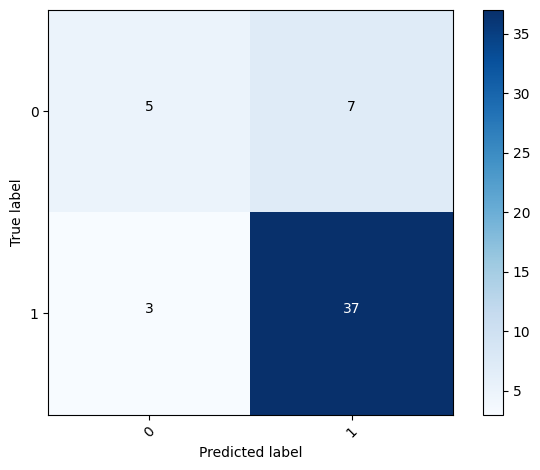

In [ ]:
#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = [1 if res > 0 else 0 for res in grid_search.predict(X_test)]
y_test = [1 if res > 0 else 0 for res in y_test]
#print(y_test, prediction_test)

import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title=title
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

from sklearn import metrics
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
conf_matrix = metrics.confusion_matrix(y_test, prediction_test)
TN, FP, FN, TP = conf_matrix.ravel()
FNR = FN / (FN + TP)
FPR = FP / (FP + TN)

print("False Negative Rate:", FNR)
print("False Positive Rate:", FPR)
cm_plot_labels = [0,1]
plot_confusion_matrix(conf_matrix,cm_plot_labels)

#Test accuracy for various test sizes and see how it gets better with more training data

#One amazing feature of Random forest is that it provides us info on feature importances
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.
# Print feature importances using the best RandomForestClassifier model
importances = best_rf_model.feature_importances_

# Create a Pandas Series to display feature importances
feature_list = list(X.columns)
feature_imp = pd.Series(importances, index=feature_list).sort_values(ascending=False)
print("Feature Importances:")
print(feature_imp)

In [ ]:
pred1 = grid_search.predict(np.array([[30,1,0.05]]))
pred2 = grid_search.predict(np.array([[30,1,0.85]]))
# 'predictions' now contains the predicted values for the new data
print(pred1)  #sick(hyperkinetic dysphonia)
print(pred2)  #healthy

[2]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
pd.options.mode.chained_assignment  = None

# Define the base file name pattern and the number of files to process
num_files = 208



# Set the sample rate
sample_rate = 8000

amplitute_threshold = 0
amount_threshold = 0

def distinct_frequencies_count_by_wave(wave_x):
  number_of_frames_in_window = 512 # we want a power of 2 and a ~23ms window, with a sampling rate of 8000HZ and n = 256 we get a 32ms window which is close enough
  X = librosa.stft(wave_x,n_fft=number_of_frames_in_window)   #X for amplitude
  amplitute = abs(wave_x).mean()

  num_frequencies = X.shape[0]
  num_windows = X.shape[1]
  # Measuring the amount of frequencies that are louder than the average amplitude for more than half the windows (aka time slots)
  high_frequencies_above_threshold = np.sum(abs(X[num_frequencies//2:]) > amplitute_threshold*amplitute, axis=1)
  high_distinct_frequencies_count = np.sum(high_frequencies_above_threshold > num_windows*amount_threshold)
  low_frequencies_above_threshold = np.sum(abs(X[:num_frequencies//2]) > amplitute_threshold*amplitute, axis=1)
  low_distinct_frequencies_count = np.sum(low_frequencies_above_threshold > num_windows*amount_threshold)
  # normalized_spectrum = abs(X) / np.sum(abs(X), axis=0)
  # normalized_spectrum = np.nansum(normalized_spectrum ,axis = 1)/normalized_spectrum.shape[1]
  # high_distinct_frequencies_count = np.sum(normalized_spectrum[num_frequencies//2:]>=max(normalized_spectrum)/50)
  # low_distinct_frequencies_count =  np.sum(normalized_spectrum[:num_frequencies//2]>=max(normalized_spectrum)/50)

  return low_distinct_frequencies_count, high_distinct_frequencies_count

def find_local_maxima(input_list):
    local_maxima = []
    for i in range(1, len(input_list) - 1):
        if input_list[i] > input_list[i - 1] and input_list[i] > input_list[i + 1]:
            local_maxima.append(input_list[i])
    return local_maxima

number_of_frames_in_window = 512
fft_freqs = librosa.fft_frequencies(sr=sample_rate, n_fft=number_of_frames_in_window)
def calc_avg_frequency(wave_x):
  X = librosa.stft(wave_x,n_fft=number_of_frames_in_window)
  sum_freqeuncy_amplituteds = np.sum(abs(X),axis=1)
  sum_weighted_frequency = np.multiply(fft_freqs,sum_freqeuncy_amplituteds)
  avg_frequency = sum(sum_weighted_frequency)/sum(sum(abs(X)))
  return avg_frequency

headers = ["avg amplitude","distinct frequencies",
           "distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency",
           "min frequency","total change in amplitude","mfcc5_mean"]
average = {}
for seed in range(50):
  accuracy_list = []
  for i in range(len(headers)):
    for j in range(i+1,len(headers)):
      drop = ["avg amplitude","distinct frequencies",
                "distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency",
                          "min frequency","total change in amplitude","mfcc5_mean"]
      drop.remove(headers[i])
      drop.remove(headers[j])



      # Define the file name
      file_name = "my_array.csv"
      df = pd.read_csv(file_name)

      df.drop(['medications'], axis=1, inplace=True)
      df.situation[df.situation == 'healthy'] = 0
      df.situation[df.situation == 'hyperkinetic'] = 1
      df.situation[df.situation == 'hypokinetic'] = 1
      df.situation[df.situation == 'reflux'] = 1
      df.sex[df.sex == 'M'] = 0
      df.sex[df.sex == 'F'] = 1

      Y = df["situation"].values  #At this point Y is an object not of type int
      #Convert Y to int
      Y=Y.astype('int')
      X = df.drop(labels=["no.", "situation"]+drop, axis=1)# "sex", "situation", "medications","avg amplitude","distinct frequencies",
                #"distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency", "min frequency","total change in amplitude","mfcc5_mean"], axis=1)

      X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=seed ,test_size=0.20)

      # Define the hyperparameters and their candidate values for tuning
      param_grid = {
          'n_estimators': [200]#, 100, 300],
          # 'max_depth': [None, 10, 20],
          # 'min_samples_split': [2, 5, 10],
          # 'min_samples_leaf': [1, 2, 4],
      }

      # Create the RandomForestClassifier
      rf_classifier = RandomForestClassifier(random_state=seed)

      # Create GridSearchCV with the classifier and hyperparameters
      grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

      # Fit the GridSearchCV to your training data
      grid_search.fit(X_train, y_train)

      # Get the best hyperparameters found by GridSearchCV
      best_params = grid_search.best_params_

      # Get the best model with the best hyperparameters
      best_rf_model = grid_search.best_estimator_

      # Evaluate the best model on your test data
      accuracy = best_rf_model.score(X_test, y_test)
      accuracy_list.append(f"acc: {accuracy}, feature 1: {headers[i]}, feature 2: {headers[j]}")
      average[f"{headers[i]}-{headers[j]}"] = average.get(f"{headers[i]}-{headers[j]}",0) + accuracy
      print(f"seed: {seed}, acc: {accuracy}, feature 1: {headers[i]}, feature 2: {headers[j]}")


  with open(f'best_pair_seed{seed}.txt', 'w') as outfile:
   outfile.write('\n'.join(str(i) for i in accuracy_list))

with open(f'best_pair_average.txt', 'w') as outfile:
  for key,value in average.items():
   outfile.write(f"features: {key}, acc: {value/50}\n")


seed: 0, acc: 0.7619047619047619, feature 1: avg amplitude, feature 2: distinct frequencies
seed: 0, acc: 0.7619047619047619, feature 1: avg amplitude, feature 2: distinct low frequencies
seed: 0, acc: 0.6904761904761905, feature 1: avg amplitude, feature 2: distinct high frequencies
seed: 0, acc: 0.7380952380952381, feature 1: avg amplitude, feature 2: avg frequency
seed: 0, acc: 0.6904761904761905, feature 1: avg amplitude, feature 2: max frequency
seed: 0, acc: 0.7380952380952381, feature 1: avg amplitude, feature 2: min frequency
seed: 0, acc: 0.6904761904761905, feature 1: avg amplitude, feature 2: total change in amplitude
seed: 0, acc: 0.6904761904761905, feature 1: avg amplitude, feature 2: mfcc5_mean
seed: 0, acc: 0.6904761904761905, feature 1: distinct frequencies, feature 2: distinct low frequencies
seed: 0, acc: 0.7142857142857143, feature 1: distinct frequencies, feature 2: distinct high frequencies
seed: 0, acc: 0.7142857142857143, feature 1: distinct frequencies, feature

In [ ]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
pd.options.mode.chained_assignment  = None

# Define the base file name pattern and the number of files to process
num_files = 208



# Set the sample rate
sample_rate = 8000

amplitute_threshold = 0
amount_threshold = 0

def distinct_frequencies_count_by_wave(wave_x):
  number_of_frames_in_window = 512 # we want a power of 2 and a ~23ms window, with a sampling rate of 8000HZ and n = 256 we get a 32ms window which is close enough
  X = librosa.stft(wave_x,n_fft=number_of_frames_in_window)   #X for amplitude
  amplitute = abs(wave_x).mean()

  num_frequencies = X.shape[0]
  num_windows = X.shape[1]
  # Measuring the amount of frequencies that are louder than the average amplitude for more than half the windows (aka time slots)
  high_frequencies_above_threshold = np.sum(abs(X[num_frequencies//2:]) > amplitute_threshold*amplitute, axis=1)
  high_distinct_frequencies_count = np.sum(high_frequencies_above_threshold > num_windows*amount_threshold)
  low_frequencies_above_threshold = np.sum(abs(X[:num_frequencies//2]) > amplitute_threshold*amplitute, axis=1)
  low_distinct_frequencies_count = np.sum(low_frequencies_above_threshold > num_windows*amount_threshold)
  # normalized_spectrum = abs(X) / np.sum(abs(X), axis=0)
  # normalized_spectrum = np.nansum(normalized_spectrum ,axis = 1)/normalized_spectrum.shape[1]
  # high_distinct_frequencies_count = np.sum(normalized_spectrum[num_frequencies//2:]>=max(normalized_spectrum)/50)
  # low_distinct_frequencies_count =  np.sum(normalized_spectrum[:num_frequencies//2]>=max(normalized_spectrum)/50)

  return low_distinct_frequencies_count, high_distinct_frequencies_count

def find_local_maxima(input_list):
    local_maxima = []
    for i in range(1, len(input_list) - 1):
        if input_list[i] > input_list[i - 1] and input_list[i] > input_list[i + 1]:
            local_maxima.append(input_list[i])
    return local_maxima

number_of_frames_in_window = 512
fft_freqs = librosa.fft_frequencies(sr=sample_rate, n_fft=number_of_frames_in_window)
def calc_avg_frequency(wave_x):
  X = librosa.stft(wave_x,n_fft=number_of_frames_in_window)
  sum_freqeuncy_amplituteds = np.sum(abs(X),axis=1)
  sum_weighted_frequency = np.multiply(fft_freqs,sum_freqeuncy_amplituteds)
  avg_frequency = sum(sum_weighted_frequency)/sum(sum(abs(X)))
  return avg_frequency

headers = ["avg amplitude","distinct frequencies",
           "distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency",
           "min frequency","total change in amplitude","mfcc5_mean"]
average = 0
for seed in range(50):
  drop = ["distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency",
                      "min frequency","mfcc5_mean"]



  # Define the file name
  file_name = "my_array.csv"
  df = pd.read_csv(file_name)

  df.drop(['medications'], axis=1, inplace=True)
  df.situation[df.situation == 'healthy'] = 0
  df.situation[df.situation == 'hyperkinetic'] = 1
  df.situation[df.situation == 'hypokinetic'] = 1
  df.situation[df.situation == 'reflux'] = 1
  df.sex[df.sex == 'M'] = 0
  df.sex[df.sex == 'F'] = 1

  Y = df["situation"].values  #At this point Y is an object not of type int
  #Convert Y to int
  Y=Y.astype('int')
  X = df.drop(labels=["no.", "situation"]+drop, axis=1)# "sex", "situation", "medications","avg amplitude","distinct frequencies",
            #"distinct low frequencies", "distinct high frequencies","avg frequency", "max frequency", "min frequency","total change in amplitude","mfcc5_mean"], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=seed ,test_size=0.20)

  # Define the hyperparameters and their candidate values for tuning
  param_grid = {
      'n_estimators': [100]#, 100, 300],
      # 'max_depth': [None, 10, 20],
      # 'min_samples_split': [2, 5, 10],
      # 'min_samples_leaf': [1, 2, 4],
  }

  # Create the RandomForestClassifier
  rf_classifier = RandomForestClassifier(random_state=seed)

  # Create GridSearchCV with the classifier and hyperparameters
  grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

  # Fit the GridSearchCV to your training data
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters found by GridSearchCV
  best_params = grid_search.best_params_

  # Get the best model with the best hyperparameters
  best_rf_model = grid_search.best_estimator_

  # Evaluate the best model on your test data
  accuracy = best_rf_model.score(X_test, y_test)
  average += accuracy
  print(f"seed: {seed}, acc: {accuracy}")

print(f"Total Acc: {average/50}")


seed: 0, acc: 0.6904761904761905
seed: 1, acc: 0.7619047619047619
seed: 2, acc: 0.6904761904761905
seed: 3, acc: 0.8333333333333334
seed: 4, acc: 0.6428571428571429
seed: 5, acc: 0.8095238095238095
seed: 6, acc: 0.8333333333333334
seed: 7, acc: 0.7619047619047619
seed: 8, acc: 0.8333333333333334
seed: 9, acc: 0.7857142857142857
seed: 10, acc: 0.7619047619047619
seed: 11, acc: 0.7142857142857143
seed: 12, acc: 0.7857142857142857
seed: 13, acc: 0.7380952380952381
seed: 14, acc: 0.6190476190476191
seed: 15, acc: 0.8095238095238095
seed: 16, acc: 0.8571428571428571
seed: 17, acc: 0.7619047619047619
seed: 18, acc: 0.6666666666666666
seed: 19, acc: 0.8095238095238095
seed: 20, acc: 0.7142857142857143
seed: 21, acc: 0.8095238095238095
seed: 22, acc: 0.7380952380952381
seed: 23, acc: 0.7857142857142857
seed: 24, acc: 0.7619047619047619
seed: 25, acc: 0.6904761904761905
seed: 26, acc: 0.6666666666666666
seed: 27, acc: 0.7857142857142857
seed: 28, acc: 0.7619047619047619
seed: 29, acc: 0.7619047

In [ ]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the number of audio files and the base file pattern
num_files = 10  # Replace with the actual number of audio files
base_file_pattern = "audio_file{}.wav"  # Replace with the actual file naming pattern

# Initialize lists to store audio data and labels
mfcc_features = []
labels = []

for file_number in range(1, num_files + 1):
    file_name = base_file_pattern.format(file_number)

    # Extract the label from the file name or directory structure as needed
    label = get_label_from_filename(file_name)  # You need to define this function

    audio, _ = librosa.load(file_name, sr=44100)  # Load audio file
    mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=13)  # Extract MFCCs

    mfcc_features.append(mfcc)
    labels.append(label)

# Convert lists to NumPy arrays
mfcc_features = np.array(mfcc_features)
labels = np.array(labels)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mfcc_features, encoded_labels, test_size=0.2, random_state=42)

# Now you can proceed to train a machine learning model using X_train and y_train, and evaluate it on X_test and y_test.

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Example: Support Vector Classifier

model = SVC(kernel='linear')  # Example SVM model
model.fit(X_train, y_train)



NameError: ignored

In [ ]:
import librosa
import numpy as np

# Load the audio file
file = "voice001.wav"
wave_x, sample_rate = librosa.load(file, sr=8000)

# Calculate MFCC features
mfccs = librosa.feature.mfcc(y=wave_x, sr=sample_rate, n_mfcc=13)

# Calculate the mean of MFCC coefficients along each feature
mfccs_mean = np.mean(mfccs, axis=1)

# Print or use mfccs_mean as needed
print("MFCC Mean:")
print(mfccs_mean)

MFCC Mean:
[-89.87831    53.312515  -66.39385   -16.300682   -6.631975   17.999435
 -27.778965   15.623698    6.1694803 -34.712456   -3.559567   -6.3958507
  -8.561319 ]


In [ ]:
!ls

In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

file = "voice001.wav" #M32 Sick
file2 = "voice002.wav" #M55 Healthy
file3 = "voice003.wav" #M34 Sick
file4 = "voice024.wav" #M38 Healthy
file5 = "voice018.wav" #F57 hyperkinetic
# load audio file with Librosa
wave_x, sample_rate = librosa.load(file, sr=8000)
wave_x2, sample_rate2 = librosa.load(file2, sr=8000)
wave_x3, sample_rate3 = librosa.load(file3, sr=8000)
wave_x4, sample_rate4 = librosa.load(file4, sr=8000)
wave_x5, sample_rate5 = librosa.load(file5, sr=8000)

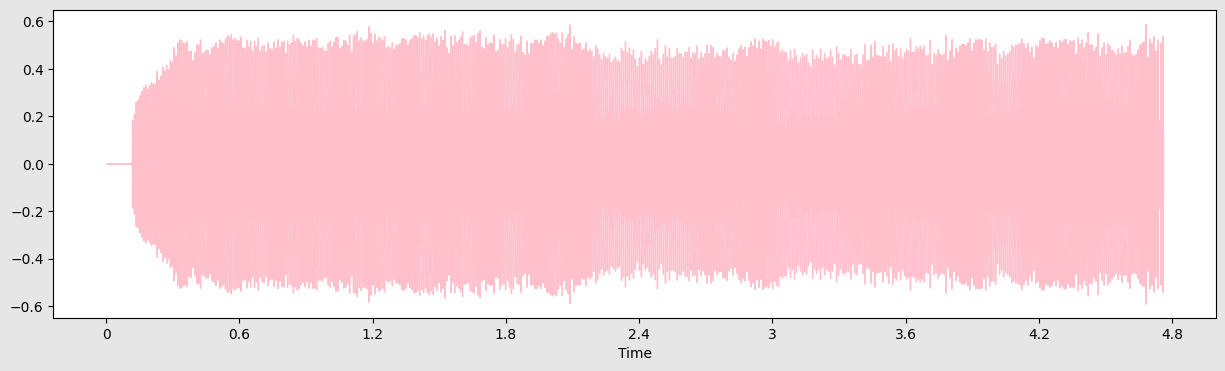

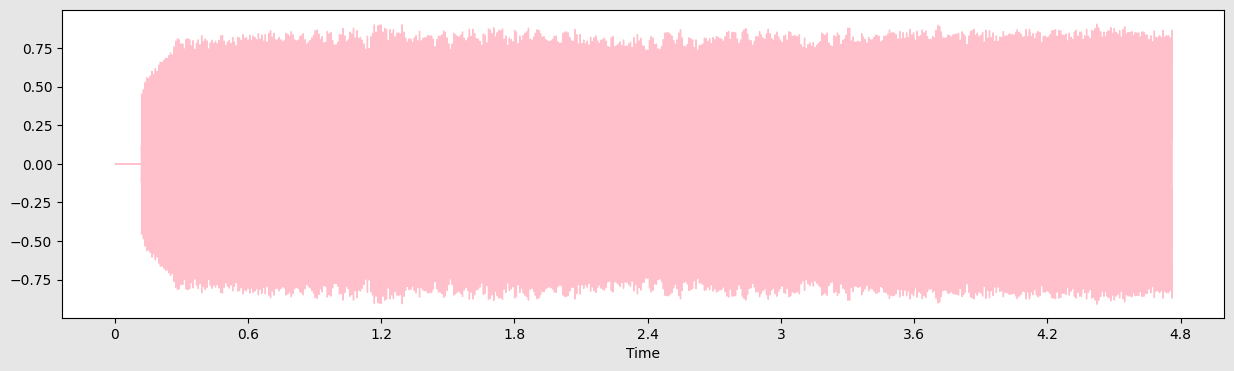

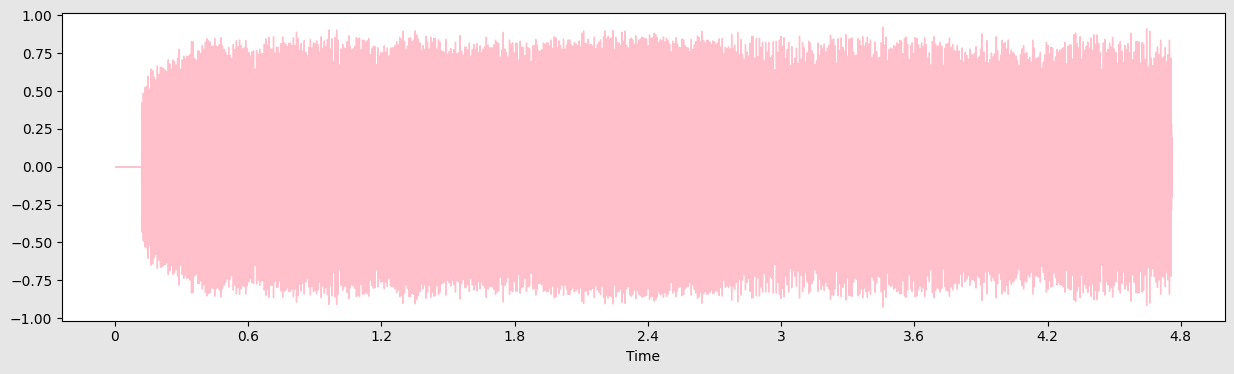

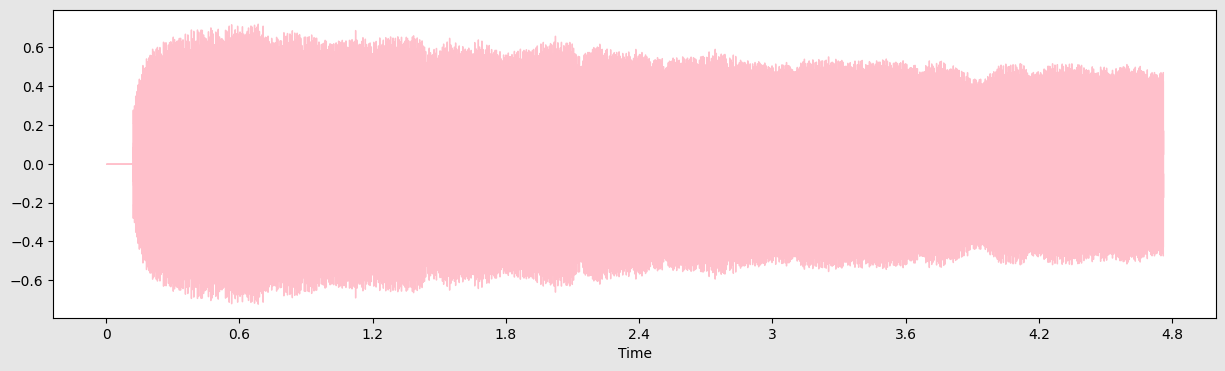

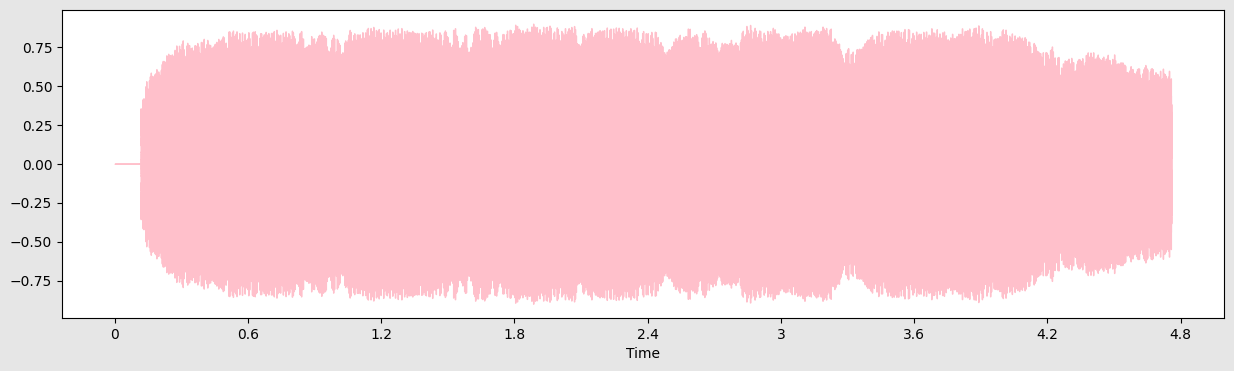

In [ ]:
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(wave_x, sr=sample_rate, color='pink')
plt.show()
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(wave_x2, sr=sample_rate, color='pink')
plt.show()
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(wave_x3, sr=sample_rate, color='pink')
plt.show()
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(wave_x4, sr=sample_rate, color='pink')
plt.show()
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(wave_x5, sr=sample_rate, color='pink')
plt.show()

In [ ]:
number_of_frames_in_window = 512 # we want a power of 2 and a ~23ms window, with a sampling rate of 8000HZ and n = 256 we get a 32ms window which is close enough
X = librosa.stft(wave_x,n_fft=number_of_frames_in_window)   #X for amplitude
Xdb = librosa.amplitude_to_db(abs(X))                     #Xdb for db when convert amplitude to db


X2 = librosa.stft(wave_x2,n_fft=number_of_frames_in_window)   #X for amplitude
Xdb2 = librosa.amplitude_to_db(abs(X2))
X3 = librosa.stft(wave_x3,n_fft=number_of_frames_in_window)   #X for amplitude
Xdb3 = librosa.amplitude_to_db(abs(X3))
X4 = librosa.stft(wave_x4,n_fft=number_of_frames_in_window)   #X for amplitude
Xdb4 = librosa.amplitude_to_db(abs(X4))
X5 = librosa.stft(wave_x5,n_fft=number_of_frames_in_window)   #X for amplitude
Xdb5 = librosa.amplitude_to_db(abs(X5))

#print(Xdb[-1])
# Example 2D NumPy array (replace with your data)
data = Xdb

def histogram_of_distinct_values(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    return unique_values, counts

# Iterate through subarrays and compute histograms of distinct values for each one
'''
for subarray in data:
    unique_values, counts = histogram_of_distinct_values(subarray)
    print("Unique Values:", unique_values)
    print("Counts:", counts)
    print()'''

[[-55.83265   -55.83265   -55.83265   ... -12.998742   -5.8493805
  -15.13013  ]
 [-55.83265   -55.83265   -55.83265   ... -19.275867   -5.4612436
   -5.4578934]
 [-55.83265   -55.83265   -55.83265   ... -20.702589   -4.780174
   -2.6183274]
 ...
 [-55.83265   -55.83265   -55.83265   ... -32.417328  -33.03016
  -34.003487 ]
 [-55.83265   -55.83265   -55.83265   ... -29.189016  -27.210037
  -33.175426 ]
 [-55.83265   -55.83265   -55.83265   ... -30.324455  -26.390608
  -37.70565  ]]


'\nfor subarray in data:\n    unique_values, counts = histogram_of_distinct_values(subarray)\n    print("Unique Values:", unique_values)\n    print("Counts:", counts)\n    print()'

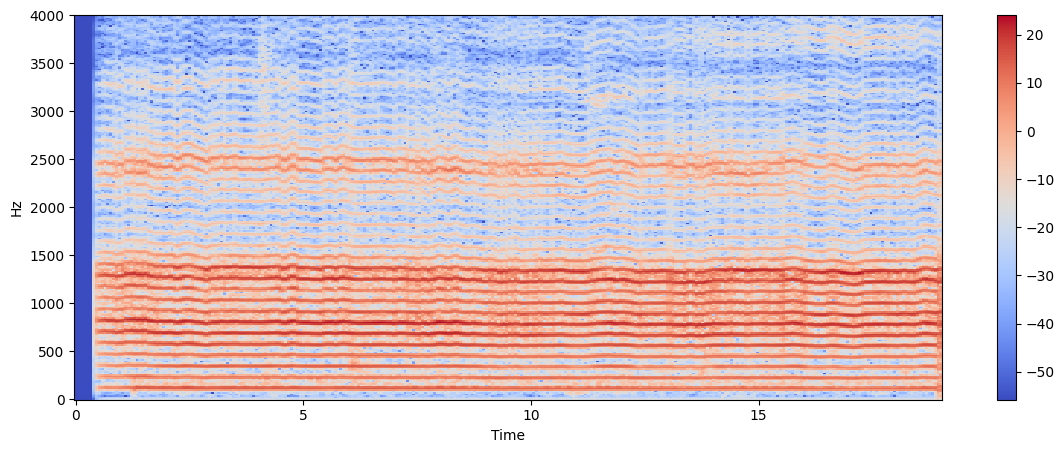

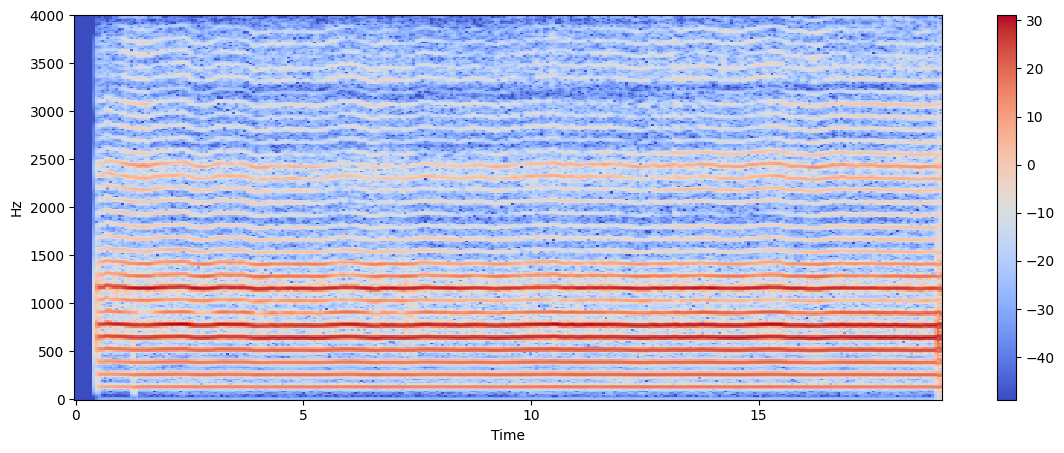

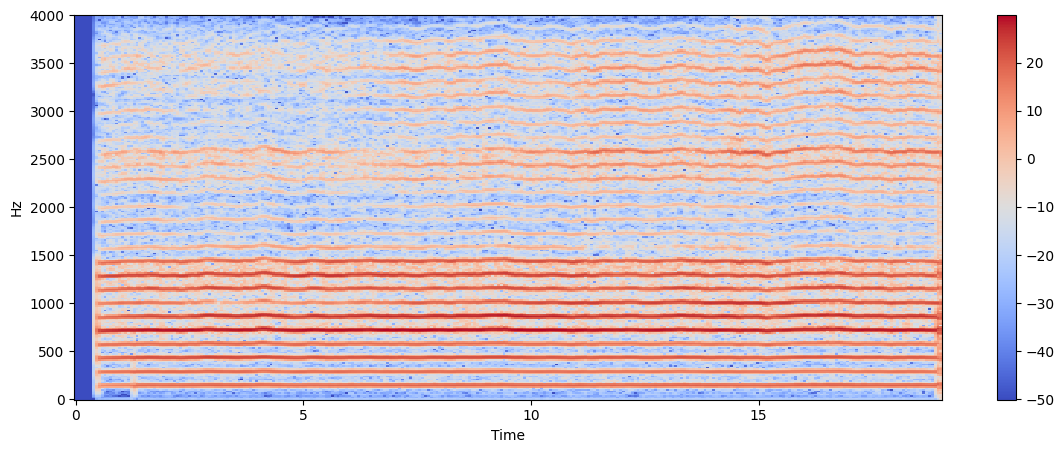

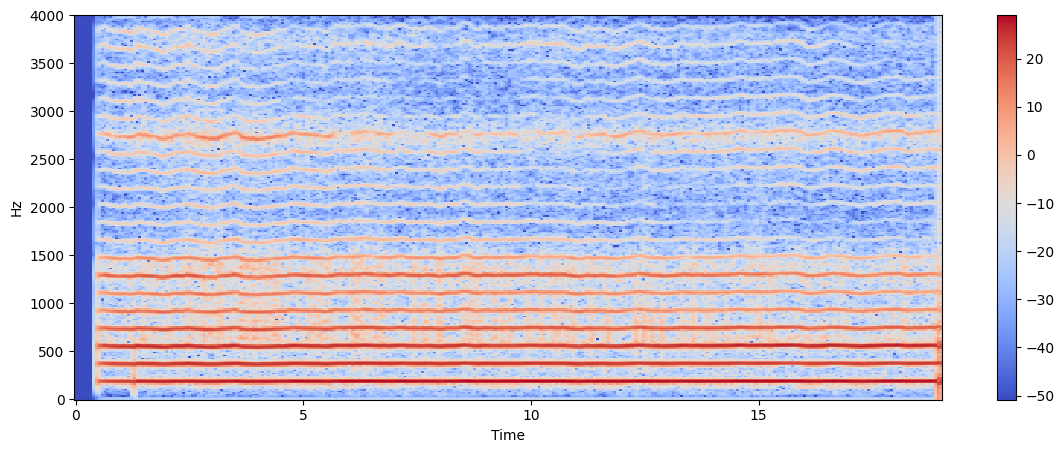

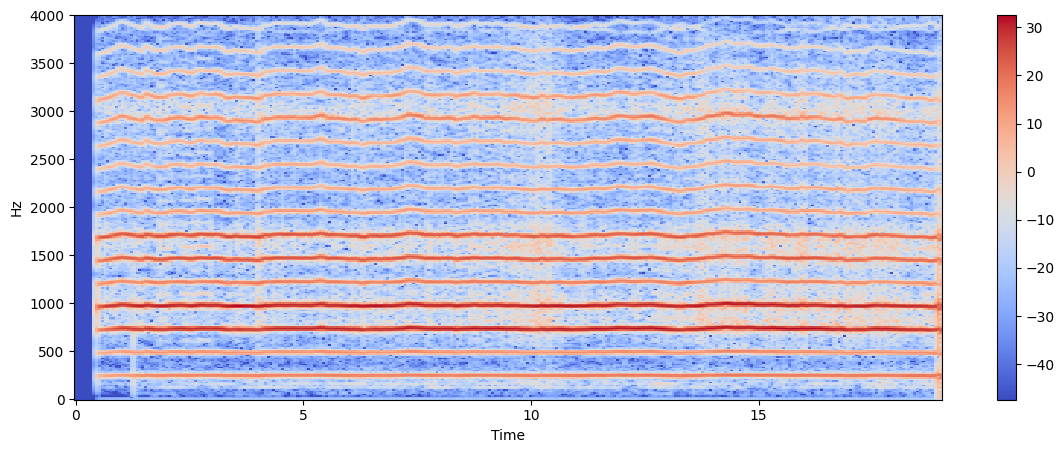

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz',n_fft=number_of_frames_in_window)
plt.title = "Sick"
plt.colorbar()
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb2, sr=sample_rate, x_axis='time', y_axis='hz',n_fft=number_of_frames_in_window)
plt.colorbar()
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb3, sr=sample_rate, x_axis='time', y_axis='hz',n_fft=number_of_frames_in_window)
plt.colorbar()
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb4, sr=sample_rate, x_axis='time', y_axis='hz',n_fft=number_of_frames_in_window)
plt.colorbar()
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb5, sr=sample_rate, x_axis='time', y_axis='hz',n_fft=number_of_frames_in_window)
plt.colorbar()

# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb-Xdb2, sr=sample_rate, x_axis='time', y_axis='hz')
# plt.colorbar()







In [ ]:
def find_local_maxima(input_list):
    local_maxima = []
    for i in range(1, len(input_list) - 1):
        if input_list[i] > input_list[i - 1] and input_list[i] > input_list[i + 1]:
            local_maxima.append(input_list[i])
    return local_maxima
def average_local_maxima(wave_x):
    local_maxima = find_local_maxima(abs(wave_x))
    avg = np.mean(local_maxima)
    return avg

print(average_local_maxima(wave_x4))

0.21515068


In [ ]:
amplituted_1 = abs(wave_x).mean()
print(f"Ampltiude 1: {amplituted_1}")
amplituted_2 = abs(wave_x2).mean()
print(f"Ampltiude 2: {amplituted_2}")
amplituted_3 = abs(wave_x3).mean()
print(f"Ampltiude 3: {amplituted_3}")
amplituted_4 = abs(wave_x4).mean()
print(f"Ampltiude 4: {amplituted_4}")
amplituted_5 = abs(wave_x5).mean()
print(f"Ampltiude 5: {amplituted_5}")
# amplituted_1 = average_local_maxima(wave_x)
# print(f"Ampltiude 1: {amplituted_1}")
# amplituted_2 = average_local_maxima(wave_x2)
# print(f"Ampltiude 2: {amplituted_2}")
# amplituted_3 = average_local_maxima(wave_x3)
# print(f"Ampltiude 3: {amplituted_3}")
# amplituted_4 = average_local_maxima(wave_x4)
# print(f"Ampltiude 4: {amplituted_4}")
# amplituted_5 = average_local_maxima(wave_x5)
# print(f"Ampltiude 5: {amplituted_5}")

Ampltiude 1: 0.08729901164770126
Ampltiude 2: 0.2250232845544815
Ampltiude 3: 0.18969658017158508
Ampltiude 4: 0.16430337727069855
Ampltiude 5: 0.2223445326089859


In [ ]:
np.sum(np.abs(np.diff(find_local_maxima(wave_x3[10000:30000]))))

795.18475

In [ ]:
#print(X)
#Xdb = librosa.amplitude_to_db(abs(X))

#print(Xdb[-1])
# Example 2D NumPy array (replace with your data)
#data = Xdb

def histogram_of_distinct_values(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    return unique_values, counts

num_windows = X.shape[1]
print(X.shape)
# Measuring the amount of frequencies that are louder than the average amplitude for more than half the windows (aka time slots)
frequencies_above_threshold = np.sum(abs(X) > amplituted_1*1.5, axis=1)
#print(frequencies_above_threshold)
distinct_frequencies_count = np.sum(frequencies_above_threshold > num_windows*0.7)
print(distinct_frequencies_count)

frequencies_above_threshold2 = np.sum(abs(X2) > amplituted_2*1.5, axis=1)
#print(frequencies_above_threshold2)
distinct_frequencies_count2 = np.sum(frequencies_above_threshold2 > num_windows*0.7)
print(distinct_frequencies_count2)

frequencies_above_threshold3 = np.sum(abs(X3) > amplituted_3*1.5, axis=1)
distinct_frequencies_count3 = np.sum(frequencies_above_threshold3 > num_windows*0.7)
print(distinct_frequencies_count3)

frequencies_above_threshold4 = np.sum(abs(X4) > amplituted_4*1.5, axis=1)
distinct_frequencies_count4 = np.sum(frequencies_above_threshold4 > num_windows*0.7)
print(distinct_frequencies_count4)

frequencies_above_threshold5 = np.sum(abs(X5) > amplituted_5*1.5, axis=1)
distinct_frequencies_count5 = np.sum(frequencies_above_threshold5 > num_windows*0.7)
print(distinct_frequencies_count5)

(257, 298)
110
53
101
46
47


In [ ]:
normalized_spectrum = abs(X2) / np.sum(abs(X2), axis=0)
normalized_spectrum = np.nansum(normalized_spectrum ,axis = 1)/normalized_spectrum.shape[1]
np.sum(normalized_spectrum>=max(normalized_spectrum)/50)

<ipython-input-27-785b2d05613b>:1: RuntimeWarning: invalid value encountered in divide
  normalized_spectrum = abs(X2) / np.sum(abs(X2), axis=0)


60

1

In [ ]:
fft_freqs = librosa.fft_frequencies(sr=sample_rate, n_fft=number_of_frames_in_window)

print("FFT Frequencies (in Hz):", fft_freqs)
fft_freqs.shape

FFT Frequencies (in Hz): [   0.      15.625   31.25    46.875   62.5     78.125   93.75   109.375
  125.     140.625  156.25   171.875  187.5    203.125  218.75   234.375
  250.     265.625  281.25   296.875  312.5    328.125  343.75   359.375
  375.     390.625  406.25   421.875  437.5    453.125  468.75   484.375
  500.     515.625  531.25   546.875  562.5    578.125  593.75   609.375
  625.     640.625  656.25   671.875  687.5    703.125  718.75   734.375
  750.     765.625  781.25   796.875  812.5    828.125  843.75   859.375
  875.     890.625  906.25   921.875  937.5    953.125  968.75   984.375
 1000.    1015.625 1031.25  1046.875 1062.5   1078.125 1093.75  1109.375
 1125.    1140.625 1156.25  1171.875 1187.5   1203.125 1218.75  1234.375
 1250.    1265.625 1281.25  1296.875 1312.5   1328.125 1343.75  1359.375
 1375.    1390.625 1406.25  1421.875 1437.5   1453.125 1468.75  1484.375
 1500.    1515.625 1531.25  1546.875 1562.5   1578.125 1593.75  1609.375
 1625.    1640.625 1656.25

(257,)

In [ ]:



num_frequencies = X.shape[0]
print(X.shape)
# Measuring the amount of frequencies that are louder than the average amplitude for more than half the windows (aka time slots)
high_frequencies_above_threshold = np.sum(abs(X[num_frequencies//2:]) > amplituted_1, axis=1)
high_distinct_frequencies_count = np.sum(high_frequencies_above_threshold > num_windows*0.5)
print(high_distinct_frequencies_count)

high_frequencies_above_threshold2 = np.sum(abs(X2[num_frequencies//2:]) > amplituted_2, axis=1)
high_distinct_frequencies_count2 = np.sum(high_frequencies_above_threshold2 > num_windows*0.5)
print(high_distinct_frequencies_count2)

high_frequencies_above_threshold3 = np.sum(abs(X3[num_frequencies//2:]) > amplituted_3, axis=1)
high_distinct_frequencies_count3 = np.sum(high_frequencies_above_threshold3 > num_windows*0.5)
print(high_distinct_frequencies_count3)

high_frequencies_above_threshold4 = np.sum(abs(X4[num_frequencies//2:]) > amplituted_4, axis=1)
high_distinct_frequencies_count4 = np.sum(high_frequencies_above_threshold4 > num_windows*0.5)
print(high_distinct_frequencies_count4)

high_frequencies_above_threshold5 = np.sum(abs(X5[num_frequencies//2:]) > amplituted_5, axis=1)
high_distinct_frequencies_count5 = np.sum(high_frequencies_above_threshold5 > num_windows*0.5)
print(high_distinct_frequencies_count5)

(257, 298)
54
17
91
20
40


In [ ]:



num_frequencies = X.shape[0]
print(X.shape)
# Measuring the amount of frequencies that are louder than the average amplitude for more than half the windows (aka time slots)
low_frequencies_above_threshold = np.sum(abs(X[:num_frequencies//2]) > amplituted_1, axis=1)
low_distinct_frequencies_count = np.sum(low_frequencies_above_threshold > num_windows*0.5)
print(low_distinct_frequencies_count)

low_frequencies_above_threshold2 = np.sum(abs(X2[:num_frequencies//2]) > amplituted_2, axis=1)
low_distinct_frequencies_count2 = np.sum(low_frequencies_above_threshold2 > num_windows*0.5)
print(low_distinct_frequencies_count2)

low_frequencies_above_threshold3 = np.sum(abs(X3[:num_frequencies//2]) > amplituted_3, axis=1)
low_distinct_frequencies_count3 = np.sum(low_frequencies_above_threshold3 > num_windows*0.5)
print(low_distinct_frequencies_count3)

low_frequencies_above_threshold4 = np.sum(abs(X4[:num_frequencies//2]) > amplituted_4, axis=1)
low_distinct_frequencies_count4 = np.sum(low_frequencies_above_threshold4 > num_windows*0.5)
print(low_distinct_frequencies_count4)

low_frequencies_above_threshold5 = np.sum(abs(X5[:num_frequencies//2]) > amplituted_5, axis=1)
low_distinct_frequencies_count5 = np.sum(low_frequencies_above_threshold5 > num_windows*0.5)
print(low_distinct_frequencies_count5)

(257, 298)
115
68
90
84
70


In [ ]:
fft_freqs = librosa.fft_frequencies(sr=sample_rate, n_fft=number_of_frames_in_window)
# Calculate the weighted average frequency
sum_freqeuncy_amplituteds = np.sum(abs(X5),axis=1)
sum_weighted_frequency = np.multiply(fft_freqs,sum_freqeuncy_amplituteds)
avg_frequency = sum(sum_weighted_frequency)/sum(sum(abs(X5)))
avg_frequency

#print("Average Frequency:", weighted_avg_frequency)

1360.0848846006763

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=wave_x5,sr=sample_rate,n_fft=number_of_frames_in_window)
mean_frequency = np.mean(spectral_centroids)
print("Average Frequency:", mean_frequency)

Average Frequency: 1321.7936832359878


In [ ]:
cutoff = 0.85
max_frequency = librosa.feature.spectral_rolloff(y=wave_x, sr=sample_rate, roll_percent=cutoff)
max_frequency.mean()

1972.7604166666667

In [ ]:
cutoff = 0.85
min_frequency = librosa.feature.spectral_rolloff(y=wave_x, sr=sample_rate, roll_percent=1-cutoff)
min_frequency.mean()

538.6979166666666

In [ ]:
tempo, beat_frames = librosa.beat.beat_track(y=wave_x, sr=sample_rate)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
tempo2, beat_frames2 = librosa.beat.beat_track(y=wave_x5, sr=sample_rate2)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo2))

Estimated tempo: 133.93 beats per minute
Estimated tempo: 66.96 beats per minute


In [ ]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sample_rate)

beat_times2 = librosa.frames_to_time(beat_frames2, sr=sample_rate2)

In [ ]:
print(beat_times)
print(beat_times.shape)
print(beat_times2)
print(beat_times2.shape)

[0.192]
(1,)
[0.192]
(1,)


Text(0.5, 1.0, 'Waveform of a recording from our database')

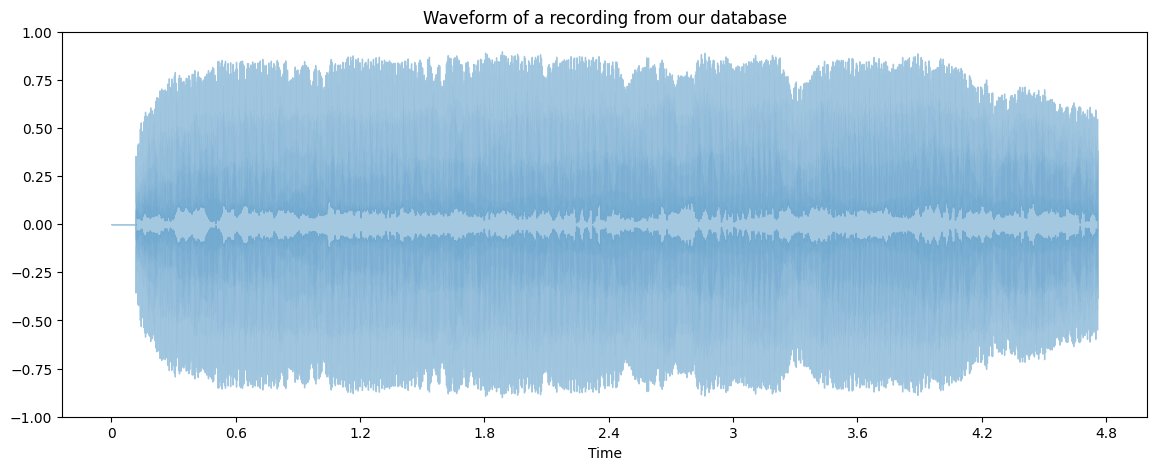

In [ ]:
#plt.figure(figsize=(14, 5))
#librosa.display.waveshow(wave_x,sr=sample_rate, alpha=0.4)
#plt.vlines(beat_times, -1, 1, color='r')
#plt.ylim(-1, 1)
plt.figure(figsize=(14, 5),)

librosa.display.waveshow(wave_x5,sr=sample_rate2, alpha=0.4)
#plt.vlines(beat_times2, -1, 1, color='g')
plt.ylim(-1, 1)
plt.title("Waveform of a recording from our database")
#plt.figure(figsize=(14, 5))

#librosa.display.waveshow(wave_x3,sr=sample_rate, alpha=0.4)
#plt.ylim(-1, 1)
#plt.figure(figsize=(14, 5))
#librosa.display.waveshow(wave_x4,sr=sample_rate2, alpha=0.4)
#plt.ylim(-1, 1)

In [ ]:
from ipywidgets import interact

In [ ]:
def f(start_bpm, tightness_exp):
    return librosa.beat.beat_track(wave_x, sr=sample_rate, start_bpm=start_bpm, tightness=10**tightness_exp, units='time')
interact(f, start_bpm=60, tightness_exp=2)

interactive(children=(IntSlider(value=60, description='start_bpm', max=180, min=-60), IntSlider(value=2, descr…

<function __main__.f(start_bpm, tightness_exp)>

(-1.0, 1.0)

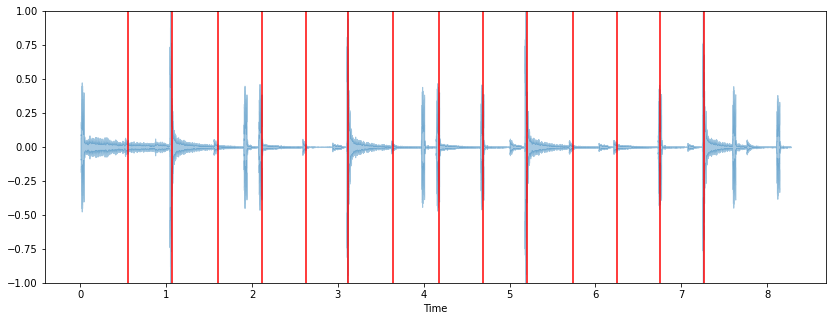

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wave_x, alpha=0.4)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim(-1, 1)

In [ ]:
print(X[58,4])
print(X[...,58,1023])



(-1.2095455+0.8489565j)


IndexError: ignored

In [ ]:
[1,2,3][4,5,6][7,8,9]
[1,4,7][2,5,8][3,6,9]